<a href="https://colab.research.google.com/github/pzoliveira/DSNaiveBayes/blob/main/DSNaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando os Dados

In [1]:
import pickle

In [2]:
with open('credito.pkl', 'rb') as f:
  X_credito_treino, y_credito_treino, X_credito_teste, y_credito_teste = pickle.load(f)

In [3]:
X_credito_treino.shape, y_credito_treino.shape

((22806, 3), (22806,))

# Treinamento do Modelo

In [4]:
from sklearn.naive_bayes import GaussianNB

In [6]:
nb_credito = GaussianNB()
nb_credito.fit(X_credito_treino, y_credito_treino)

GaussianNB()

# Previsão do Modelo

In [7]:
previsoes = nb_credito.predict(X_credito_teste)
previsoes

array([0, 1, 0, ..., 0, 0, 0])

In [8]:
y_credito_teste

array([0, 0, 0, ..., 1, 0, 0])

# Métrica do Modelo

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
accuracy_score(y_credito_teste, previsoes)

0.7976470588235294

In [11]:
confusion_matrix(y_credito_teste, previsoes)

array([[7587,  157],
       [1821,  210]])

# Gráfico Confusion Matrix

In [ ]:
!pip install yellowbrick

In [12]:
from yellowbrick.classifier import ConfusionMatrix

0.7976470588235294

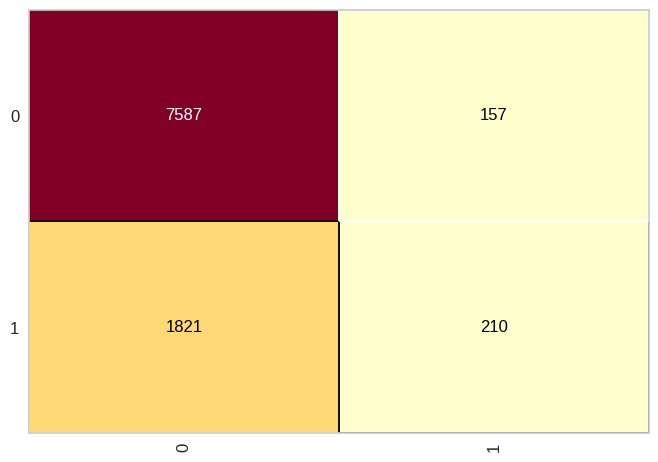

In [13]:
cm = ConfusionMatrix(nb_credito)
cm.fit(X_credito_treino, y_credito_treino)
cm.score(X_credito_teste, y_credito_teste)

In [14]:
print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      7744
           1       0.57      0.10      0.18      2031

    accuracy                           0.80      9775
   macro avg       0.69      0.54      0.53      9775
weighted avg       0.76      0.80      0.74      9775



# Balanceando os Dados de Treino

In [5]:
from imblearn.over_sampling import SMOTE

In [15]:
sm = SMOTE(random_state=42)
X_res_treino, y_res_treino = sm.fit_resample(X_credito_treino, y_credito_treino)

In [16]:
import seaborn as sns

<Axes: ylabel='count'>

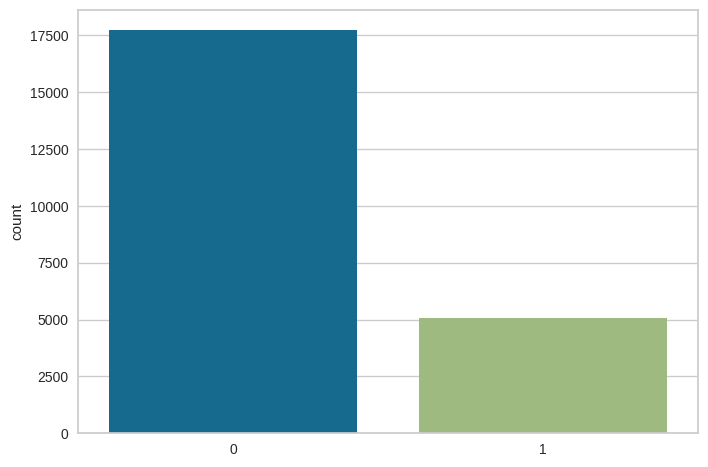

In [17]:
sns.countplot(x = y_credito_treino)

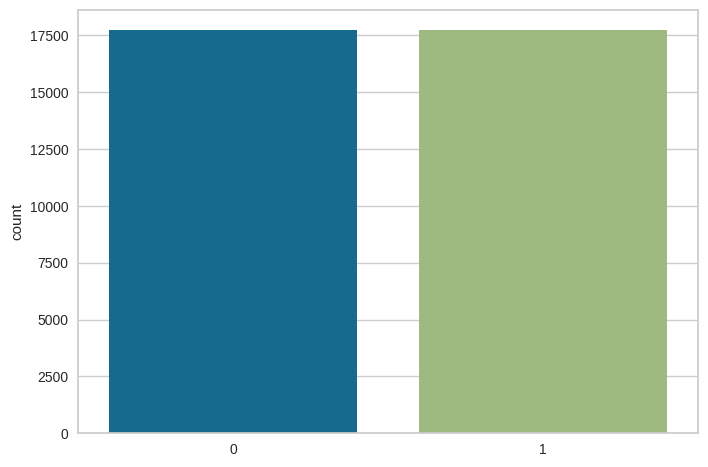

In [18]:
sns.countplot(x = y_res_treino);

# Treinando o Modelo balanceado

In [19]:
nb_res = GaussianNB()
nb_res.fit(X_res_treino, y_res_treino)

GaussianNB()

# Previsões do Modelo balanceado

In [20]:
previsoes_res = nb_res.predict(X_credito_teste)

In [21]:
previsoes_res

array([1, 1, 0, ..., 1, 1, 0])

In [22]:
y_credito_teste

array([0, 0, 0, ..., 1, 0, 0])

# Métricas do Modelo balanceado

In [24]:
accuracy_score(y_credito_teste, previsoes_res)

0.3553964194373401

In [25]:
confusion_matrix(y_credito_teste, previsoes_res)

array([[1564, 6180],
       [ 121, 1910]])

In [26]:
print(classification_report(y_credito_teste, previsoes_res))

              precision    recall  f1-score   support

           0       0.93      0.20      0.33      7744
           1       0.24      0.94      0.38      2031

    accuracy                           0.36      9775
   macro avg       0.58      0.57      0.35      9775
weighted avg       0.78      0.36      0.34      9775

